In [1]:
cd C:\Users\great\Desktop\博士申请\nyu

C:\Users\great\Desktop\博士申请\nyu


In [2]:
import datetime
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
df=pd.read_csv('mturk_surveys.csv')
print (df.head())

   Unnamed: 0  gender        hit_answered_date        hit_creation_date  \
0           0  female  2016-06-30 16:32:21.931  2016-06-30 16:01:11.000   
1           1    male  2016-06-30 15:47:54.105  2016-06-30 15:46:10.000   
2           2  female  2016-06-30 15:33:58.699  2016-06-30 15:31:12.000   
3           3  female  2016-06-30 15:25:40.968  2016-06-30 15:16:10.000   
4           4  female  2016-06-30 15:11:41.654  2016-06-30 15:01:11.000   

   household_income household_size location_city location_country  \
0   $15,000-$24,999              3  johnson city               US   
1   $10,000-$14,999              3       kolkata               IN   
2  $100,000 or more              3   gainesville               US   
3   $25,000-$39,999              2      columbia               US   
4   $75,000-$99,999              2       chicago               US   

  location_region marital_status  post_to_completion_secs  \
0              tn        married                   1870.0   
1           

In [3]:
df["hit_answered_date"]=pd.to_datetime(df["hit_answered_date"])
df["hit_creation_date"]=pd.to_datetime(df["hit_creation_date"])
df["household_income"]=df["household_income"].astype("category")
df["household_size"]=df["household_size"].astype("category")
df["location_country"]=df["location_country"].astype("category")
df["marital_status"]=df["marital_status"].astype("category")
df['date'] = map(lambda x : x.date(), df['hit_answered_date'])
df['time'] = map(lambda x : x.time(), df['hit_answered_date'])
df.dtypes
df["gender"][df["gender"]=="Female"]="female"

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
import datetime
minDate = min(df['hit_answered_date'])
maxDate = max(df['hit_answered_date'])
days = (maxDate - minDate).days
print(minDate.strftime("%Y-%m-%d"))
print (maxDate.day)
print (days)

2015-03-26
30
462


In [5]:
df1 = pd.DataFrame(df)
df1

,Unnamed: 0,gender,hit_answered_date,hit_creation_date,household_income,household_size,location_city,location_country,location_region,marital_status,post_to_completion_secs,worker_id,year_of_birth,date,time
0,0,female,2016-06-30 16:32:21.931,2016-06-30 16:01:11,"$15,000-$24,999",3,johnson city,US,tn,married,1870.0,e32a93e2b2ca201229d1ce9bf5f1e690,1971,<map object at 0x000001EBE47EBCF8>,<map object at 0x000001EBE47EBDD8>
1,1,male,2016-06-30 15:47:54.105,2016-06-30 15:46:10,"$10,000-$14,999",3,kolkata,IN,wb,single,104.0,4d95deb58b53b833a19e67eb45ab1bef,1995,<map object at 0x000001EBE47EBCF8>,<map object at 0x000001EBE47EBDD8>
2,2,female,2016-06-30 15:33:58.699,2016-06-30 15:31:12,"$100,000 or more",3,gainesville,US,va,married,166.0,e957176f654eba122eb3f8b5de2aceac,1956,<map object at 0x000001EBE47EBCF8>,<map object at 0x000001EBE47EBDD8>
3,3,female,2016-06-30 15:25:40.968,2016-06-30 15:16:10,"$25,000-$39,999",2,columbia,US,mo,single,570.0,744f8396e65938713d1889374f8e120f,1965,<map object at 0x000001EBE47EBCF8>,<map object at 0x000001EBE47EBDD8>
4,4,female,2016-06-30 15:11:41.654,2016-06-30 15:01:11,"$75,000-$99,999",2,chicago,US,il,engaged,630.0,7d3825d727f090a48ae937db8a19ef54,1986,<map object at 0x000001EBE47EBCF8>,<map object at 0x000001EBE47EBDD8>
5,5,male,2016-06-30 14:49:55.366,2016-06-30 14:46:11,"$15,000-$24,999",5+,chennai,IN,tn,single,224.0,1d1f7473a7a4f6b5b5addc07ac3ca10f,1993,<map object at 0x000001EBE47EBCF8>,<map object at 0x000001EBE47EBDD8>
6,6,female,2016-06-30 14:39:15.753,2016-06-30 14:31:12,"$40,000-$59,999",5+,parsippany-troy hills,US,nj,married,483.0,55666939c94f388be18bf04507b07cf4,1971,<map object at 0x000001EBE47EBCF8>,<map object at 0x000001EBE47EBDD8>
7,7,female,2016-06-30 14:19:21.506,2016-06-30 14:16:12,"$100,000 or more",2,versailles,US,in,married,189.0,12d910cb563f8e7db94ccf3aed58c3f8,1979,<map object at 0x000001EBE47EBCF8>,<map object at 0x000001EBE47EBDD8>
8,8,female,2016-06-30 14:03:08.679,2016-06-30 14:01:12,"$75,000-$99,999",2,lebanon,US,me,married,116.0,827b3e2d442d51c532c224dd4774443f,1960,<map object at 0x000001EBE47EBCF8>,<map object at 0x000001EBE47EBDD8>
9,9,male,2016-06-30 13:46:37.137,2016-06-30 13:46:12,"$75,000-$99,999",2,baltimore,US,md,cohabitating,25.0,361e0f70dbcdef9a82729cf5c7d31642,1988,<map object at 0x000001EBE47EBCF8>,<map object at 0x000001EBE47EBDD8>


In [32]:
time1 =  list(df['hit_answered_date'])
for i in range(len(time1)):
    time1[i]=str(time1[i].strftime("%Y-%m-%d"))
df1["day"]=time1
df1["countn"]=time1
#countn = pd.DataFrame()
for i in range(len(df['day'])):
    for df1[[i],["gender"]] =="male":
       m=1#countn[i]=1
df1

SyntaxError: invalid syntax (<ipython-input-32-2d3db17a4565>, line 8)

In [7]:
df1.groupby("day").count1.sum()  #

KeyError: 'day'

In [8]:
gender=df1["count"].groupby(df1["day","gender"])
gender.head()

KeyError: ('day', 'gender')

In [12]:
df_us = df[df["location_country"]=="US"]
print(df_us)

       Unnamed: 0  gender       hit_answered_date   hit_creation_date  \
0               0  female 2016-06-30 16:32:21.931 2016-06-30 16:01:11   
2               2  female 2016-06-30 15:33:58.699 2016-06-30 15:31:12   
3               3  female 2016-06-30 15:25:40.968 2016-06-30 15:16:10   
4               4  female 2016-06-30 15:11:41.654 2016-06-30 15:01:11   
6               6  female 2016-06-30 14:39:15.753 2016-06-30 14:31:12   
7               7  female 2016-06-30 14:19:21.506 2016-06-30 14:16:12   
8               8  female 2016-06-30 14:03:08.679 2016-06-30 14:01:12   
9               9    male 2016-06-30 13:46:37.137 2016-06-30 13:46:12   
10             10    male 2016-06-30 13:32:38.192 2016-06-30 13:31:11   
13             13  female 2016-06-30 12:48:24.706 2016-06-30 12:46:11   
15             15  female 2016-06-30 12:33:11.178 2016-06-30 12:31:12   
16             16  female 2016-06-30 12:14:40.179 2016-06-30 12:01:16   
17             17    male 2016-06-30 11:59:12.233 2

In [15]:

#print(g_us)
time1 =  list(df_us['hit_answered_date'])
for i in range(len(time1)):
    time1[i]=str(time1[i].strftime("%Y-%m-%d"))
#print(time1)

gender=df_us["gender"]
df1=pd.DataFrame(time1,gender)
print(df1)
#g_us = (time1,df_us["gender"].value_counts() / len(df_us))

                 0
gender            
female  2016-06-30
female  2016-06-30
female  2016-06-30
female  2016-06-30
female  2016-06-30
female  2016-06-30
female  2016-06-30
male    2016-06-30
male    2016-06-30
female  2016-06-30
female  2016-06-30
female  2016-06-30
male    2016-06-30
female  2016-06-30
female  2016-06-30
female  2016-06-30
female  2016-06-30
male    2016-06-30
male    2016-06-30
female  2016-06-30
male    2016-06-30
male    2016-06-30
female  2016-06-30
female  2016-06-30
female  2016-06-30
female  2016-06-30
male    2016-06-30
male    2016-06-30
male    2016-06-30
female  2016-06-30
...            ...
male    2015-03-26
male    2015-03-26
male    2015-03-26
female  2015-03-26
male    2015-03-26
male    2015-03-26
male    2015-03-26
female  2015-03-26
female  2015-03-26
male    2015-03-26
female  2015-03-26
female  2015-03-26
female  2015-03-26
female  2015-03-26
female  2015-03-26
female  2015-03-26
male    2015-03-26
female  2015-03-26
male    2015-03-26
male    2015

In [9]:
df1["gender"].plot.bar(stacked=True)

TypeError: Empty 'DataFrame': no numeric data to plot

In [21]:
#var = df1.groupby('gender')

#a=gender.value_counts() / len(df_us)
#a.plot.bar(stacked=True,color=["r","b"])

#plt.plot(time1)
var = df.groupby(['hit_answered_date','gender'])
var.plot.bar(stacked=True,color=['red','blue'],grid=False)

plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

In [ ]:
print(df["location_country"])
country1 = df["location_country"]

country1[any(country1) != "US" and "IN" ]= "Others"
print(country1)

Unnamed: 0                          int64
gender                             object
hit_answered_date          datetime64[ns]
hit_creation_date          datetime64[ns]
household_income                 category
household_size                   category
location_city                      object
location_country                 category
location_region                    object
marital_status                   category
post_to_completion_secs           float64
worker_id                          object
year_of_birth                       int64
date                               object
time                               object
dtype: object

In [14]:
print(df["location_country"])
country1 = df["location_country"]
country1[country1 !="US" ]="Other"

0        US
1        IN
2        US
3        US
4        US
5        IN
6        US
7        US
8        US
9        US
10       US
11       FR
12       IN
13       US
14       IN
15       US
16       US
17       US
18       US
19       IN
20       US
21       IN
22       IN
23       US
24       IN
25       IN
26       DE
27       IN
28       US
29       US
         ..
45000    US
45001    US
45002    US
45003    EG
45004    US
45005    US
45006    IN
45007    US
45008    US
45009    IN
45010    US
45011    IN
45012    US
45013    US
45014    IN
45015    US
45016    US
45017    US
45018    US
45019    CA
45020    US
45021    US
45022    US
45023    US
45024    IN
45025    US
45026    IN
45027    US
45028    US
45029    US
Name: location_country, dtype: category
Categories (126, object): [AE, AL, AR, AT, ..., VN, ZA, ZM, ZZ]


ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [7]:
country = df['location_country'].value_counts() / len(df)
print(country)


US    0.780235
IN    0.154630
CA    0.008372
GB    0.006107
ZZ    0.002665
DE    0.002665
PH    0.002554
FR    0.002398
IT    0.001799
AE    0.001421
BR    0.001399
MX    0.001310
AU    0.001221
ES    0.001177
RO    0.001177
MK    0.001133
JP    0.001088
NZ    0.000999
SG    0.000955
VE    0.000933
PR    0.000844
TR    0.000844
SA    0.000799
GR    0.000777
TH    0.000733
NL    0.000666
RU    0.000666
IE    0.000644
RS    0.000644
PT    0.000600
        ...   
IS    0.000067
LC    0.000067
BY    0.000067
GD    0.000067
ZM    0.000067
PA    0.000067
BS    0.000044
IQ    0.000044
BH    0.000044
GY    0.000044
BB    0.000044
UG    0.000044
AZ    0.000044
BM    0.000022
BO    0.000022
TZ    0.000022
BU    0.000022
CN    0.000022
DZ    0.000022
ET    0.000022
FJ    0.000022
IM    0.000022
LB    0.000022
LI    0.000022
MN    0.000022
MV    0.000022
NI    0.000022
PS    0.000022
SK    0.000022
JO    0.000022
Name: location_country, dtype: float64


In [29]:
print (country)

US    0.780235
IN    0.154630
CA    0.008372
GB    0.006107
ZZ    0.002665
DE    0.002665
PH    0.002554
FR    0.002398
IT    0.001799
AE    0.001421
BR    0.001399
MX    0.001310
AU    0.001221
ES    0.001177
RO    0.001177
MK    0.001133
JP    0.001088
NZ    0.000999
SG    0.000955
VE    0.000933
PR    0.000844
TR    0.000844
SA    0.000799
GR    0.000777
TH    0.000733
NL    0.000666
RU    0.000666
IE    0.000644
RS    0.000644
PT    0.000600
        ...   
IS    0.000067
LC    0.000067
BY    0.000067
GD    0.000067
ZM    0.000067
PA    0.000067
BS    0.000044
IQ    0.000044
BH    0.000044
GY    0.000044
BB    0.000044
UG    0.000044
AZ    0.000044
BM    0.000022
BO    0.000022
TZ    0.000022
BU    0.000022
CN    0.000022
DZ    0.000022
ET    0.000022
FJ    0.000022
IM    0.000022
LB    0.000022
LI    0.000022
MN    0.000022
MV    0.000022
NI    0.000022
PS    0.000022
SK    0.000022
JO    0.000022
Name: location_country, dtype: float64


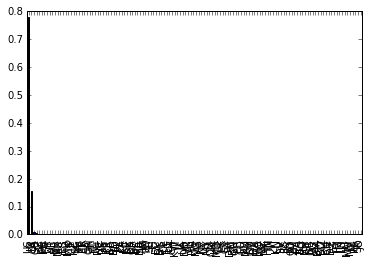

In [32]:
country.plot.bar(stacked=True)